In [140]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Oversample and plot imbalanced dataset with SMOTEaccc
from collections import Counter

dataset = pd.read_excel('/Users/eddie/Downloads/data3 (1).xlsx')

X = pd.DataFrame(dataset.iloc[:,:2].values)
Y = pd.DataFrame(dataset.iloc[:,2:].values)
time = X[0][0:30]
test = X[:][0:30]
test_ans = Y[0:30]
print(X)
print(Y)
# oversample = SMOTE()
# X_train, Y_train = oversample.fit_resample(X, Y)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
X_train = X
Y_train = Y

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
counter = Counter(Y)
print(counter)

print(X_train.shape)
print(Y_train.shape)

# features = pd.DataFrame(dataset.iloc[:,:16])
# features = features.columns
# print(features)

            0     1
0    0.000010  40.0
1    0.000020  40.0
2    0.000035  40.0
3    0.000058  40.0
4    0.000091  40.0
..        ...   ...
552  0.009512  40.0
553  0.009512  40.0
554  0.009512  40.0
555  0.009513  40.0
556  0.009513  40.0

[557 rows x 2 columns]
            0
0    0.000202
1    0.000287
2    0.000347
3    0.000405
4    0.000512
..        ...
552  0.020601
553  0.020616
554  0.020624
555  0.020624
556  0.020624

[557 rows x 1 columns]
Counter({0: 1})
(557, 2)
(557, 1)


In [141]:

# print(time)
print(test_ans)

           0
0   0.000202
1   0.000287
2   0.000347
3   0.000405
4   0.000512
5   0.000691
6   0.000976
7   0.001391
8   0.001967
9   0.002752
10  0.003816
11  0.004190
12  0.004732
13  0.005508
14  0.006608
15  0.007651
16  0.008649
17  0.009609
18  0.010993
19  0.012806
20  0.014539
21  0.016210
22  0.017831
23  0.019438
24  0.019432
25  0.019423
26  0.019437
27  0.019441
28  0.019443
29  0.019442


In [142]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPClassifier

In [143]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [144]:
res = model.predict(test)
print(res)
print(Y_train)

[0.01005808 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808
 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808
 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808
 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808
 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808 0.01005808]
            0
0    0.000202
1    0.000287
2    0.000347
3    0.000405
4    0.000512
..        ...
552  0.020601
553  0.020616
554  0.020624
555  0.020624
556  0.020624

[557 rows x 1 columns]


In [145]:
from sklearn.metrics import r2_score 
r2 = r2_score(test_ans, res) 
print(r2)

-0.021576326439267657


-0.021576326439267657


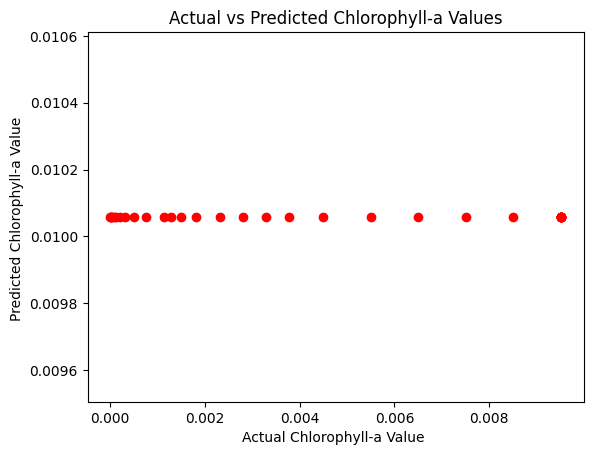

In [146]:
# trainres = model.predict(X_yest)
print(r2_score(test_ans, res))
# print(res)
# print(Y_test)
# print(trainres)
import matplotlib.pyplot as plt
plt.scatter(time, res, color = 'red')
# plt.scatter(Y_train,res,color = 'gray')
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='-', color='black', lw=3, scalex=False, scaley=False)
plt.show()

In [147]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_train,res,digits=6))

ValueError: Found input variables with inconsistent numbers of samples: [557, 30]